#Ej 1

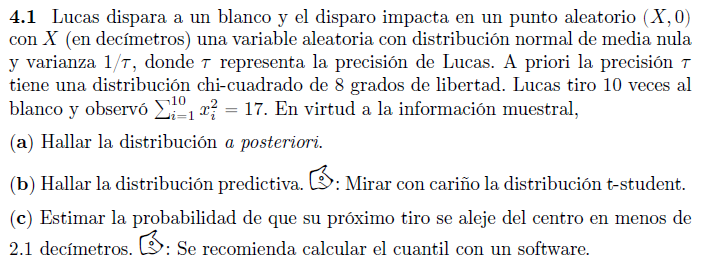

### (a) Hallar la distribución *a posteriori*

Se tienen dos distribuciones $X|\tau\sim\mathcal N(0,1/\tau)$ y $\tau \sim \chi^2_{8}$, se pide hallar la distribucion *a posteriori.* Para ello se aplica inferencia bayesiana.

$$
p(\tau|\mathcal D_n)\propto p(\tau)\prod^n_{i=1}p(x_i|\tau)
$$

Desarrollando la productoria y reemplazando $n=10$

$$
\prod^n_{i=1}p(x_i|\tau)=\left(\frac{\tau}{2\pi}\right)^{n/2}e^{-\left(\frac{\sum x_i^2}{2}\tau\right)}\mathbf 1 \{x_1,\dots,x_n\}\mathbf 1\{\tau > 0\}=\left(\frac{\tau}{2\pi}\right)^{5}e^{-\left(\frac{17}{2}\tau\right)}\mathbf 1\{\tau > 0\}
$$

Ahora se desarrolla la chi cuadrado.

$$
p(\tau) = \frac{(1/2)^{k/2}}{\Gamma(k/2)}\cdot \tau^{k/2-1}e^{-\tau/2}\mathbf 1\{\tau > 0\}=C\tau^{3}e^{-\tau/2}\mathbf 1\{\tau > 0\}
$$

En donde a *priori* la distribucion de $\tau$ tiene $k=8$ y $C\in \mathbb R$.

Reemplazando lo desarrolado previamente en la formula de la inferencia bayesiana.

$$
p(\tau|\mathcal D_n)\propto C\tau^{3}e^{-\tau/2}\cdot\left(\frac{\tau}{2\pi}\right)^{5}e^{-\left(\frac{17}{2}\tau\right)}\mathbf 1\{\tau > 0\}=C'\tau^8e^{-9\tau}\mathbf 1\{\tau > 0\}
$$

Viendo la la forma de la distribucion que quedo, se puede decir que la distribucion *a posteriori* es una gamma de parametros 9 y 9.

$$
p(\tau|\mathcal D_n)\sim \Gamma(9,9)
$$

### (b) Distribución *predictiva.*

Para hallar la distribucion predicitva se debe aplicar la siguiente formula.

$$
p(x_{test}|\mathcal D_n)=\int_{T} p(x_{test}|\tau)p(\tau|\mathcal D_n)\, d\tau
$$

Desarrollando la integral.

$$
\int_{T}\frac{\tau^{-1/2}}{\sqrt{2\pi}}e^{-\frac{x_{test}^2\tau}{2}}\tau^8e^{-9\tau}\frac{9^9}{\Gamma(9)}\mathbf 1\{\tau > 0\}\,d\tau=\frac{9^9}{\Gamma(9)}\frac{1}{\sqrt{2\pi}}\int_{T}\tau^{9.5-1}e^{-\left(9-\frac{x_{test}^2}{2}\right)\tau}\mathbf 1\{\tau > 0\}\,d\tau
$$

Cabe recordad que $\tau$  puede solo tomar valores positivos entre cero e infinito. La ultima integral que quedo tiene la forma de una funcion de gamma, esta funcion tiene la particularidad que.

$$
\int^{\infty}_{0}x^{a-1}e^{- x}\, dx=\Gamma(a)
$$

Sabiendo esto se puede deducir (mediante un cambio de variables) que.

$$
\int^{\infty}_{0}x^{a-1}e^{-\beta x}\, dx=\frac{\Gamma(a)}{\beta^a}
$$

En donde $a=9.5$ y $\beta=9+\frac{x_{test}^2}{2}$. Reemplazando el termino de la integral queda.

$$
\frac{9^9}{\Gamma(9)}\frac{1}{\sqrt{2\pi}}\Gamma(9.5)\left(9+\frac{x_{test}^2}{2}\right)^{-9.5}=\frac{9^9}{\Gamma(9)}\frac{\Gamma(9.5)}{\sqrt{2\pi}}\left(9\left(1+\frac{x_{test}^2}{18}\right)\right)^{-9.5}$$
$$
=\boxed{\frac{\Gamma(9.5)}{\Gamma(9)\sqrt{18\pi}}\left(1+\frac{x_{test}^2}{18}\right)^{-9.5},\,x_{test}\in \mathbb R}
$$

La forma de la distriibucion t-student tiene la siguiente forma.

$$
\frac{\Gamma(\frac{\nu+1}{2})}{\Gamma(\frac{\nu}{2})\sqrt{\nu\pi}}\left(1+\frac{t^2}{\nu}\right)^{-\frac{\nu+1}{2}}
$$

Con todo esto se puede decir que la distribucion predicitiva es una t-student con 18 grados de libertad.

$$
p(x_{test}|\mathcal D_n)\sim t_{18}
$$

### (c) Calculo de la probabilidad

In [ ]:
from scipy.stats import t

#Grados de libertad
df = 18
#Valor de interés (en decímetros y en valor absoluto)
x = 2.1
probabilidad = t.cdf(x, df)-t.cdf(-x, df)

# La probabilidad de estar a menos de 2.1 decímetros del centro
print("la probabilidad de que el proximo tiro se aleje 2.1 decimentros es:",probabilidad)


la probabilidad de que el proximo tiro se aleje 2.1 decimentros es: 0.9499095942904316


#Ej 2

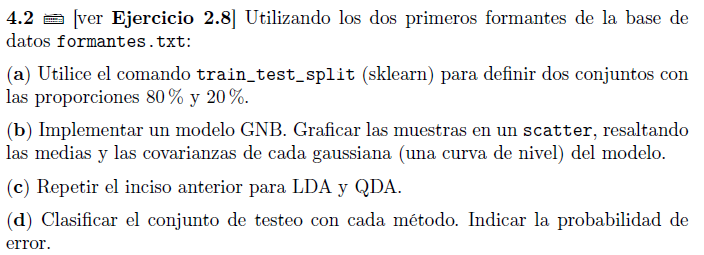

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from urllib import request
from scipy.stats import multivariate_normal
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay

In [ ]:
example_url="https://raw.githubusercontent.com/mvera1412/tallerPS/main/data/formantes.txt"
f = request.urlopen(example_url)
frecuencias = np.loadtxt(f,dtype=int ,delimiter="\t",usecols=[0, 1])
f = request.urlopen(example_url)
formantes = np.loadtxt(f,dtype=str ,delimiter="\t",usecols=3)
dataset = [frecuencias,formantes]

Se define el conjunto de entrenamiento (80%) y testeo (20%).

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(frecuencias, formantes, test_size=0.2, random_state=66)

Para implementar el modelo de GNB se debe tener en cuenta como calcular la matriz de covarianza. $$\Sigma_k = \text{DIAG}(\sigma^{2\,(k)}_{1},\dots,\sigma^{2\,(k)}_{d})$$ Siendo $$\sigma^{2\,(k)}_{j}=\frac{1}{|\mathcal{D}_k|-1}\sum_{x\in\mathcal{D}_k}(x_j-\mu_j^{(k)})^2$$

In [ ]:
def GNB_params(x,y,x_predict=None,predict=False):
    letras = np.unique(y)
    K = len(letras)
    m,n = x.shape
    mu = np.zeros([K,n])
    cov = np.zeros((K, n, n))
    Dk = np.zeros(K)

    for i in np.arange(K):
      mu[i,:] = np.mean(x[np.where(y == letras[i])][:,:n],axis = 0)
      Dk[i] = len(np.where(y ==letras[i])[0])
      #cov[i] = np.diag(np.sum((x-mu[i,:])**2,axis=0)/(Dk[i]-1))
      cov[i] = np.diag(np.var(x[np.where(y == letras[i])],axis=0))

    cy = Dk/n
    if(predict):
        #intente vectorizar y no pude.
      posibilities = np.zeros([x_predict.shape[0],K])
      for j in np.arange(K):
          inv_cov = np.linalg.inv(cov[j])
          log_det_cov = np.log(np.linalg.det(cov[j]))
          log_cy = np.log(cy[j])
          for k in np.arange(x_predict.shape[0]):
            posibilities[k,j]= -0.5*(x_predict[k]-mu[j])@inv_cov@(x_predict[k]-mu[j]).T+log_cy-0.5*log_det_cov
      return np.argmax(posibilities,axis=1)

    return mu, cov

In [ ]:
letras = np.unique(y_train)
K = len(letras)
m,n = x_train.shape
mu = np.zeros([K,n])
cov = np.zeros((K, n, n))
Dk = np.zeros(K)

for i in np.arange(K):
  mu[i,:] = np.mean(x_train[np.where(y_train == letras[i])][:,:n],axis = 0)
  Dk[i] = len(np.where(y_train ==letras[i])[0])
  cov[i] = np.diag(np.sum((x_train-mu[i,:])**2,axis=0)/(Dk[i]-1))

Para el metodo LDA se repite el codigo de la guia 2.

In [ ]:
def LDA_params(x,y,x_predict=None,predict=False):
    letras = np.unique(y)
    n,m = x.shape
    K = len(letras)
    mu = np.zeros([K,m])
    cov = np.zeros((K, m, m))
    Dk = np.zeros(K)

    for i in np.arange(K):
        mu[i,:] = np.mean(x[np.where(y == letras[i])][:,:m],axis = 0)
        cov[i] = np.cov(x[np.where(y == letras[i])][:,:m],rowvar=False, ddof= 1)
        Dk[i] = len(np.where(y ==letras[i])[0])
    cov_final = 1/(n-K)*np.sum(Dk[:, np.newaxis, np.newaxis] * cov, axis=0)

    if(predict):
        sigma_inv = np.linalg.inv(cov_final)
        W = np.zeros([K,m])
        b = np.zeros([K,1])
        for i in np.arange(K):
            W[i,:] = sigma_inv@mu[i]
            b[i,:] = -0.5*(mu[i].T@sigma_inv@mu[i])+np.log(Dk[i]/n).T
        y_pred = np.argmax(W @ x_predict[:, :m].T + b, axis=0).astype(int)
        return y_pred

    return mu, cov_final

Para el metodo QDA se debe calcular la matriz de covarianza para cada clase de la siguiente forma.$$\Sigma_k= \frac{1}{|\mathcal{D}_k|-1}\sum_{x\in\mathcal{D}_k}(x-\mu^{(k)})(x-\mu^{(k)})^T$$

In [ ]:
def QDA_params(x,y,x_predict=None,predict=False):
    letras = np.unique(y)
    n,m = x.shape
    K = len(letras)
    mu = np.zeros([K,m])
    cov = np.zeros((K, m, m))
    Dk = np.zeros(K)

    for i in np.arange(K):
        x_k = x[np.where(y == letras[i])][:,:m]
        Dk[i] = len(np.where(y ==letras[i])[0])
        mu[i,:] = np.mean(x[np.where(y == letras[i])][:,:m],axis = 0)
        cov[i]= (x_k-mu[i]).T@(x_k-mu[i])/(Dk[i]-1)
    posibilities = np.zeros([n,K])
    cy = Dk/n
    if(predict):
        posibilities = np.zeros([x_predict.shape[0],K])
        #intente vectorizar y no pude.
        for j in np.arange(K):
            inv_cov = np.linalg.inv(cov[j])
            log_det_cov = np.log(np.linalg.det(cov[j]))
            log_cy = np.log(cy[j])
            for k in np.arange(x_predict.shape[0]):
                posibilities[k,j]= -0.5*(x_predict[k]-mu[j])@inv_cov@(x_predict[k]-mu[j]).T+log_cy-0.5*log_det_cov

        return np.argmax(posibilities,axis=1)

    return mu, cov

In [ ]:
mu_LDA, cov_LDA = LDA_params(x_train,y_train)
mu_gnb, cov_gnb = GNB_params(x_train,y_train)
mu_QDA, cov_QDA = QDA_params(x_train,y_train)

Grafico las curvas de nivel para cada metodo.

Text(0.5, 1.0, 'Curvas de nivel segun GNB')

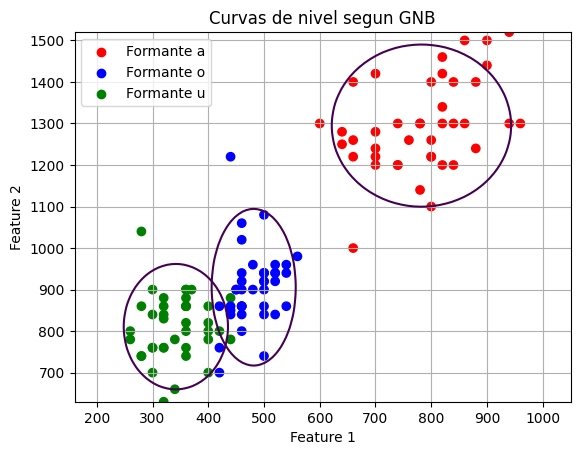

In [ ]:
letras = np.unique(y_train)
my_color = np.where(y_train == 'a', 'red', np.where(y_train == 'o', 'blue', np.where(y_train == 'u', 'green', y_train)))
for i in np.arange(3):
  [min_x,max_x] = [np.min(x_train[np.where(y_train == letras[i])][:,0])-100,np.max(x_train[np.where(y_train == letras[i])][:,0])+90]
  [min_y,max_y] = [np.min(x_train[np.where(y_train == letras[i])][:,1]),np.max(x_train[np.where(y_train == letras[i])][:,1])]
  x = np.linspace(min_x, max_x, 50)
  y = np.linspace(min_y, max_y, 50)
  XX, YY = np.meshgrid(x, y)
  pos = np.dstack((XX, YY))
  f = multivariate_normal(mu_gnb[i,:], cov_gnb[i])
  ZZ = f.pdf(pos)
  zz = (ZZ-np.mean(ZZ))/np.var(ZZ)
  plt.contour(XX, YY, zz,levels = [0.5])

plt.scatter(x_train[:,0],x_train[:,1], color = my_color)
plt.scatter([], [], color='red', label='Formante a')
plt.scatter([], [], color='blue', label='Formante o')
plt.scatter([], [], color='green', label='Formante u')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.legend()
plt.title('Curvas de nivel segun GNB')

Text(0.5, 1.0, 'Curvas de nivel segun LDA')

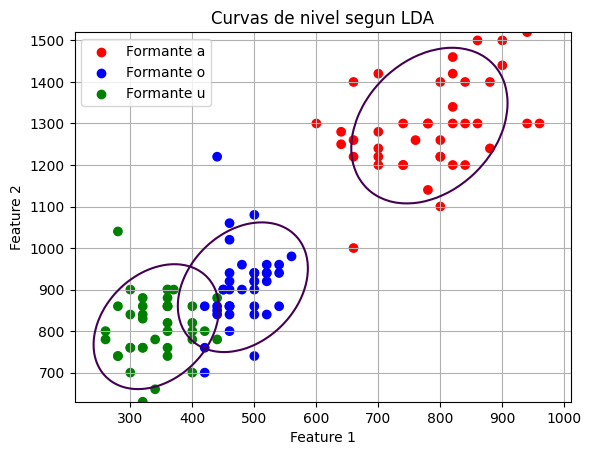

In [ ]:
letras = np.unique(y_train)
my_color = np.where(y_train == 'a', 'red', np.where(y_train == 'o', 'blue', np.where(y_train == 'u', 'green', y_train)))
for i in np.arange(3):
  [min_x,max_x] = [np.min(x_train[np.where(y_train == letras[i])][:,0])-50,np.max(x_train[np.where(y_train == letras[i])][:,0])+50]
  [min_y,max_y] = [np.min(x_train[np.where(y_train == letras[i])][:,1]),np.max(x_train[np.where(y_train == letras[i])][:,1])]
  x = np.linspace(min_x, max_x, 50)
  y = np.linspace(min_y, max_y, 50)
  XX, YY = np.meshgrid(x, y)
  pos = np.dstack((XX, YY))
  f = multivariate_normal(mu_LDA[i,:], cov_LDA)
  ZZ = f.pdf(pos)
  zz = (ZZ-np.mean(ZZ))/np.var(ZZ)
  plt.contour(XX, YY, zz,levels = [0.5])

plt.scatter(x_train[:,0],x_train[:,1], color = my_color)
plt.scatter([], [], color='red', label='Formante a')
plt.scatter([], [], color='blue', label='Formante o')
plt.scatter([], [], color='green', label='Formante u')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.legend()
plt.title('Curvas de nivel segun LDA')

Text(0.5, 1.0, 'Curvas de nivel segun QDA')

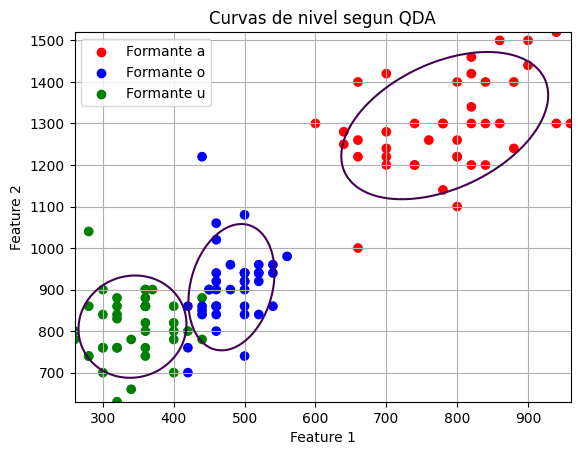

In [ ]:
letras = np.unique(y_train)
my_color = np.where(y_train == 'a', 'red', np.where(y_train == 'o', 'blue', np.where(y_train == 'u', 'green', y_train)))
for i in np.arange(3):
  [min_x,max_x] = [np.min(x_train[np.where(y_train == letras[i])][:,0]),np.max(x_train[np.where(y_train == letras[i])][:,0])]
  [min_y,max_y] = [np.min(x_train[np.where(y_train == letras[i])][:,1]),np.max(x_train[np.where(y_train == letras[i])][:,1])]
  x = np.linspace(min_x, max_x, 50)
  y = np.linspace(min_y, max_y, 50)
  XX, YY = np.meshgrid(x, y)
  pos = np.dstack((XX, YY))
  f = multivariate_normal(mu_QDA[i,:], cov_QDA[i])
  ZZ = f.pdf(pos)
  zz = (ZZ-np.mean(ZZ))/np.var(ZZ)
  plt.contour(XX, YY, zz,levels = [0.5])

plt.scatter(x_train[:,0],x_train[:,1], color = my_color)
plt.scatter([], [], color='red', label='Formante a')
plt.scatter([], [], color='blue', label='Formante o')
plt.scatter([], [], color='green', label='Formante u')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.legend()
plt.title('Curvas de nivel segun QDA')

Clasifico el conjunto de testeo y calculo su probabilidad de error.

El *predict* para los metodos GNB y QDA se realizan eligiendo el argumento maximo de la siguiente manera.
$$\text{arg max}_y\,\,-0.5(x-\mu_y)^T\Sigma_y^{-1}(x-\mu_y)+\log(c_y)-0.5\log(|\Sigma_y|) $$

In [ ]:
y_test = np.where(y_test == 'a', 0, np.where(y_test == 'o', 1, np.where(y_test == 'u', 2, y_test)))
y_test = np.array([int(num) for num in y_test])

y_pred_LDA = LDA_params(x_train,y_train,x_test,predict=True)
y_pred_GNB = GNB_params(x_train,y_train,x_test,predict=True)
y_pred_QDA = QDA_params(x_train,y_train,x_test,predict=True)

error_LDA = np.sum(y_test != y_pred_LDA)/y_test.shape[0]
error_GNB = np.sum(y_test != y_pred_GNB)/y_test.shape[0]
error_QDA = np.sum(y_test != y_pred_QDA)/y_test.shape[0]

print("Taza de error GNB:",error_GNB)
print("Taza de error LDA:",error_LDA)
print("Taza de error QDA",error_QDA)

Taza de error GNB: 0.06666666666666667
Taza de error LDA: 0.03333333333333333
Taza de error QDA 0.03333333333333333


#Ej 3

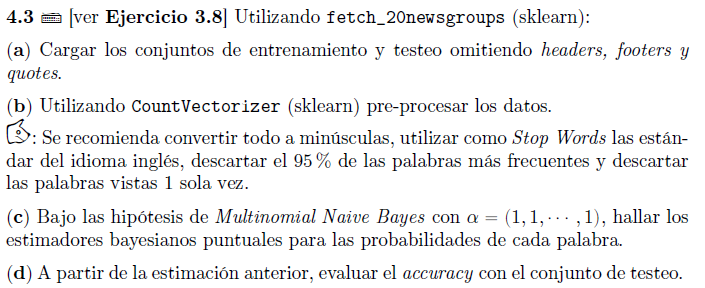

In [ ]:
import sklearn
import sklearn.datasets
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
train_data = sklearn.datasets.fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
test_data = sklearn.datasets.fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))

train_data_lower = [doc.lower() for doc in train_data.data]
test_data_lower = [doc.lower() for doc in test_data.data]

In [ ]:
vectorizer = CountVectorizer(lowercase=True, stop_words='english', max_df=0.05)

train_vectorized = vectorizer.fit_transform(train_data_lower) #d = #cant_documentos X #palabras_distintas
test_vectorized = vectorizer.transform(test_data_lower)

Obtengo la matriz Ñ, para ello debo primero obtener las etiquetas de cada clase, luego contabilizo clases y etiquetas para finalmente compactar todas las muestras de entrenemiento de cada clase en una sola. El calculo de esta matriz se hace de la siguiente forma.

$$Ñ_m^{(k)}=\sum^{n}_{i=1}N_{i,m}\cdot \mathbf{1}\{y_i=k\}$$

En donde $N_{i,m}$ es la i-esima ocurrencia de clase $k$

In [ ]:
# Obtengo las etiquetas de cada clase
train_labels = train_data.target
test_labels = test_data.target

# Número de clases y características
num_classes = np.unique(train_labels).shape[0]
num_features = train_vectorized.shape[1]

# Calcular Ñ para cada clase k y cada palabra m
N_tilde = np.zeros((num_classes, num_features))

for k in range(num_classes):
    class_indices = np.where(train_labels == k)[0]
    N_tilde[k, :] = train_vectorized[class_indices, :].sum(axis=0)

En la matriz Ñ cada fila representa una clase y cada columna una palabra.

In [ ]:
N_tilde

array([[  0.,  17.,   0., ...,   0.,   0.,   0.],
       [ 26.,  12.,   0., ...,   0.,   0.,   0.],
       [ 18.,   3.,   0., ...,   0.,   0.,   0.],
       ...,
       [  7., 145.,   1., ...,   0.,   0.,   0.],
       [ 15.,  53.,   0., ...,   0.,   0.,   0.],
       [  1.,   9.,   0., ...,   0.,   0.,   0.]])

Paso a calcular el estimador bayesiano con la siguiente formula.
$$\hat{\theta}_m^{(k)}=\frac{Ñ_m^{(k)}+\alpha_m}{\sum^{V}_{\eta}Ñ_{\eta}^{(k)}+\alpha_{\eta}} $$

In [ ]:
#Uso \alpha igual a 1 para cada palabra
alpha_m = np.ones(num_features)

denominador = np.sum(N_tilde, axis=1) + np.sum(alpha_m)
#Estimador bayesiano para cada palabra
theta_hat = (N_tilde + alpha_m) / denominador[:, np.newaxis]

A partir de $\hat{\theta}$ evaluo el accuracy con el conjunto de testeo. Para ello realizo una clasificacion de la siguiente forma.
$$\text{arg max}_y\, p(y|\mathbf x)=\text{arg max}_y\log(c_y)+\sum^{V}_{m=1}N_m\log(\theta_m^{(y)})$$

En donde $c_y$ son parametros estimados por maxima verosimilitud como:
$$\hat{c}_k=\frac{\# \{y_i=k\}}{n}$$

In [ ]:
log_theta_hat = np.log(theta_hat)
c_k = np.bincount(train_labels) / train_labels.shape[0]
log_c_k = np.log(c_k)

log_prob = np.zeros((test_vectorized.shape[0], num_classes))
for i in range(num_classes):
    log_prob[:, i] = test_vectorized @ log_theta_hat[i, :] + log_c_k[i]
predicted_classes = np.argmax(log_prob, axis=1)

accuracy = accuracy_score(test_labels, predicted_classes)

print(f'Accuracy: {accuracy :.2f}')

Accuracy: 0.64


#Ej 4

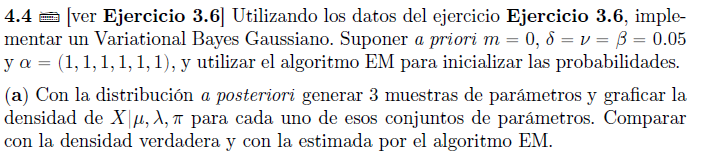

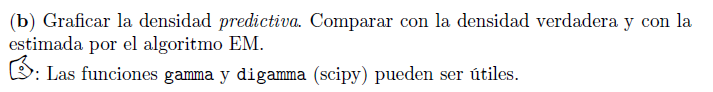

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from scipy.stats import norm
import scipy.special
from scipy.special import digamma

In [ ]:
def muestras_mezcla_gaussianas(pesos, medias, desviaciones_estandar, n_muestras):
    componentes = np.random.choice(pesos.shape[0], size=n_muestras, p=pesos)
    muestras = np.array([np.random.normal(loc=medias[i], scale=desviaciones_estandar[i]) for i in componentes])
    return muestras

Creo muestras como el ejercicio 3.6 e inicializo con EM, para lo ultimo se usa la funcion _Gaussian Mixture_ de Sklearn

In [ ]:
p = np.array([0.1,0.4,0.2,0.3])
mu = np.array([-4,0,4,5])
var = np.array([1,1.96,1.44,1])
muestras = muestras_mezcla_gaussianas(p,mu,np.sqrt(var),100)

m0 = 0
delta = nu = beta = 0.05
alpha = np.array([1, 1, 1, 1, 1, 1])

gm = GaussianMixture(n_components=6,init_params='kmeans').fit(muestras.reshape(-1,1))
mu_gm = gm.means_
sigma_gm = gm.covariances_[:,0]
p_gm = gm.weights_

gamma = gm.predict_proba(muestras.reshape(-1,1)).T


Para comenzar, calculo los estadisiticos suficiententes en base a los $\gamma_{i,k}=Q_1(u_i=k|\mathbf{x})$ que se calcularon con el predict proba. En donde $Q_1$ es el espacio latente en funcion de las muestras observadas.

Los estadisticos suficientes para el computo de los parametros en funcion de las muestras se calculan de la siguiente forma.
$$N_k=\sum^{n}_{i=1}\gamma_{i,k}\\f_k=\sum^{n}_{i=1}\gamma_{i,k}x_i\\s_k=\sum^{n}_{i=1}\gamma_{i,k}x_i^2 $$


In [ ]:
Nk = np.sum(gamma,axis=1)
fk = np.sum(gamma*muestras,axis=1)
sk = np.sum(gamma*muestras**2,axis=1)

Despues de obtener los $\gamma_{i,k}$ se pueden calcular los parametros del _Gaussinan Variational Bayes_ segun la siguiente forma mediante iteraciones.
$$\alpha_k^* = \alpha_k + \sum_{i=1}^n \gamma_{i,k} \\
        m_k^* = \frac{\delta m + \sum_{i=1}^n \gamma_{i,k} x_i}{\delta + \sum_{i=1} \gamma_{i,k}}, \\
        \delta_k^* = \delta + \sum_{i=1}^n \gamma_{i,k} \\
        \nu_k^* = \nu + \frac{1}{2} \sum_{i=1} \gamma_{i,k} \\
        \beta_k^* = \beta + \frac{\delta m^2}{2} + \frac{1}{2} \sum_{i=1}^n \gamma_{i,k} x_i^2 - \frac{\left( \delta m + \sum_{i=1}^n \gamma_{i,k} x_i \right)^2}{2 (\delta + \sum_{i=1} \gamma_{i,k})}$$

In [ ]:
def Gaussian_Variational_Bayes(muestras, alpha, m, delta, nu, beta, Nk, fk, sk, max_iter=100):
    for _ in np.arange(max_iter):
        #actualizacion de paraametros
        new_alpha = alpha + Nk
        new_m = (delta*m+fk)/(delta+Nk)
        new_delta = delta + Nk
        new_nu = nu+0.5*Nk
        new_beta = beta+0.5*((delta*m**2)+sk)-((delta*m+fk)**2)/(2*(delta+Nk))

        #actualizacion de las gammas
        rho = np.exp((digamma(new_alpha)-digamma(np.sum(new_alpha))+0.5*(digamma(new_nu)-np.log(new_beta))-(1/(2*np.log(new_delta))))[:,np.newaxis]
                    -((new_nu/(2*new_beta))[:,np.newaxis]*(new_m[:,np.newaxis]-muestras[np.newaxis,:])**2))

        gamma = (rho/np.sum(rho,axis=1)[:,np.newaxis])
        Nk, fk, sk = np.sum(gamma,axis=1), np.sum(gamma*muestras,axis=1), np.sum(gamma*muestras**2,axis=1)
        alpha, m, delta, nu, beta = new_alpha, new_m, new_delta, new_nu, new_beta

    return alpha, m, delta, nu, beta

In [ ]:
alpha, m, delta, nu, beta = Gaussian_Variational_Bayes(muestras, alpha, m0, delta, nu, beta, Nk, fk, sk)

Para generar 3 muestras de parametros, genero esos valores aleatoriamiente segun las siguentes distribuciones.
$$\pi\sim \text{Dir}(\alpha)\\ \lambda_k\sim\Gamma(\nu,\beta)\\\mu_k|\lambda_k\sim\mathcal N(m,(\delta\lambda_k)^{-1})$$
Luego las desidades en base a los parametros obtenidos tienen la siguiente distribucion.
$$x|\mu_k,\lambda_k,\pi_k \sim \mathcal N (\mu_k,\lambda_k^{-1})$$
Cabe destacar que a posteriori las distribuciones son una mezcla de gaussianas.

In [ ]:
def mixture_density(x, weights, means, variances):
    density = np.zeros_like(x)
    for weight, mean, variance in zip(weights, means, variances):
        density += weight * norm.pdf(x, mean, variance)
    return density

In [ ]:
cant_componentes = 6
cant_muestras = 3

pi_gvb  = np.random.dirichlet(alpha=alpha,size=cant_muestras)
Lambda_gvb = np.random.gamma(nu, scale=1/beta,size=(cant_muestras,cant_componentes))
mu_gvb = np.random.normal(m,np.sqrt(1/(delta*Lambda_gvb)), size= (cant_muestras, cant_componentes))

Se compara las densidades _a posteriori_  con las densidades EM y real.

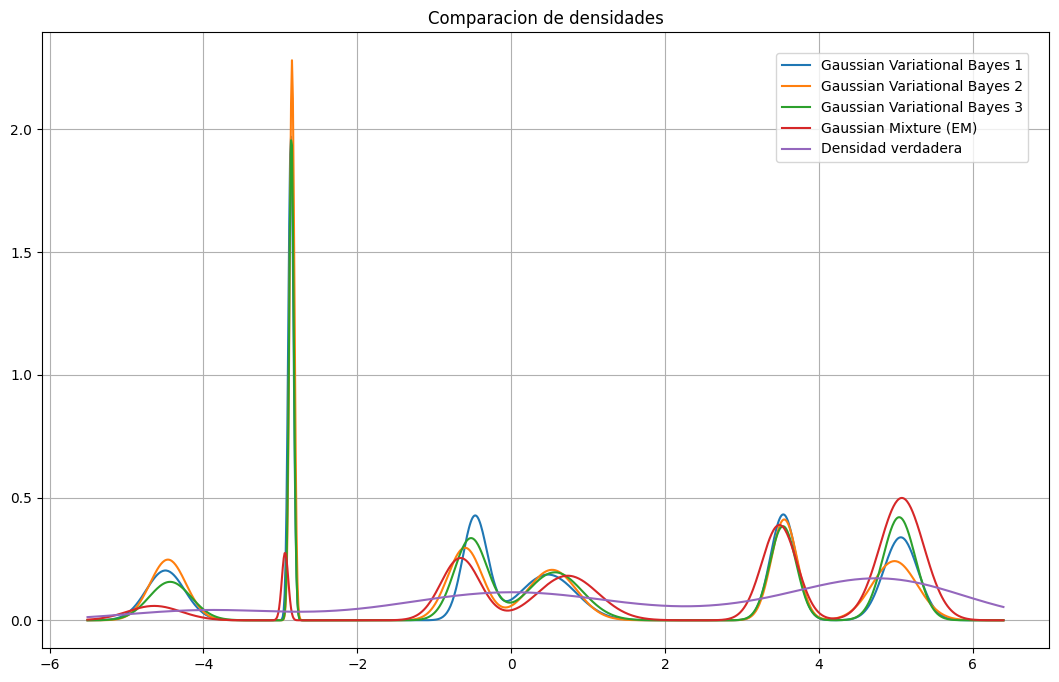

In [ ]:
x = np.linspace(np.min(muestras),np.max(muestras),1000)
densidades = np.zeros((cant_componentes,1000))

for i in np.arange(cant_muestras):
    densidades[i,:] = mixture_density(x,pi_gvb[i,:],mu_gvb[i,:],1/Lambda_gvb[i,:])


plt.figure(figsize=(13,8))
plt.plot(x,densidades[0,:], label= "Gaussian Variational Bayes 1")
plt.plot(x,densidades[1,:], label= "Gaussian Variational Bayes 2")
plt.plot(x, densidades[2,:], label= "Gaussian Variational Bayes 3")
plt.plot(x, mixture_density(x,p_gm,mu_gm,sigma_gm), label="Gaussian Mixture (EM)")
plt.plot(x,mixture_density(x, p, mu, np.sqrt(var)), label= "Densidad verdadera")
plt.title("Comparacion de densidades")
plt.grid(True)
plt.legend(loc='best', borderaxespad=1.5)



La densidad predicitva es una mezcla de t-students generalizadas.
$$p(x_{\text{test}} \mid \mathcal{D}_n) = \sum_{k=1}^K \frac{\alpha_k^*}{\sum_{c=1}^K \alpha_c^*} \cdot t\left( m_k^*, \frac{\delta_k^* \nu_k^*}{(\delta_k^* + 1) \beta_k^*}, 2 \nu_k^* \right)$$
En donde la t-student generalizada es de la siguiente forma.
$$p(x) = \frac{\Gamma\left(\frac{\nu + 1}{2}\right)}{\Gamma\left(\frac{\nu}{2}\right)} \sqrt{\frac{\Lambda}{\pi \nu}} \left(1 + \Lambda \frac{(x - \mu)^2}{\nu}\right)^{-\frac{\nu + 1}{2}}$$

In [ ]:
def predicted_density(x,alpha, delta, m, beta, nu):
    def generalized_t(mu,Lambda,nu):
        return (scipy.special.gamma((nu+1)*0.5)/scipy.special.gamma(0.5*nu))*np.sqrt(Lambda/(np.pi*nu))*(1+Lambda*(x-mu)**2/(nu))**(-(nu+1)*0.5)
    mu = m
    Lambda = delta*nu/((delta+1)*beta)
    nu_ = 2*nu
    alpha_scaled = alpha/np.sum(alpha)
    result = np.zeros_like(x)
    for i in np.arange(alpha.shape[0]):
        result += alpha_scaled[i]*generalized_t(mu[i],Lambda[i],nu_[i])
    return result

Se compara la predicitva con la densidad obtenida por EM y la densidad verdadera.

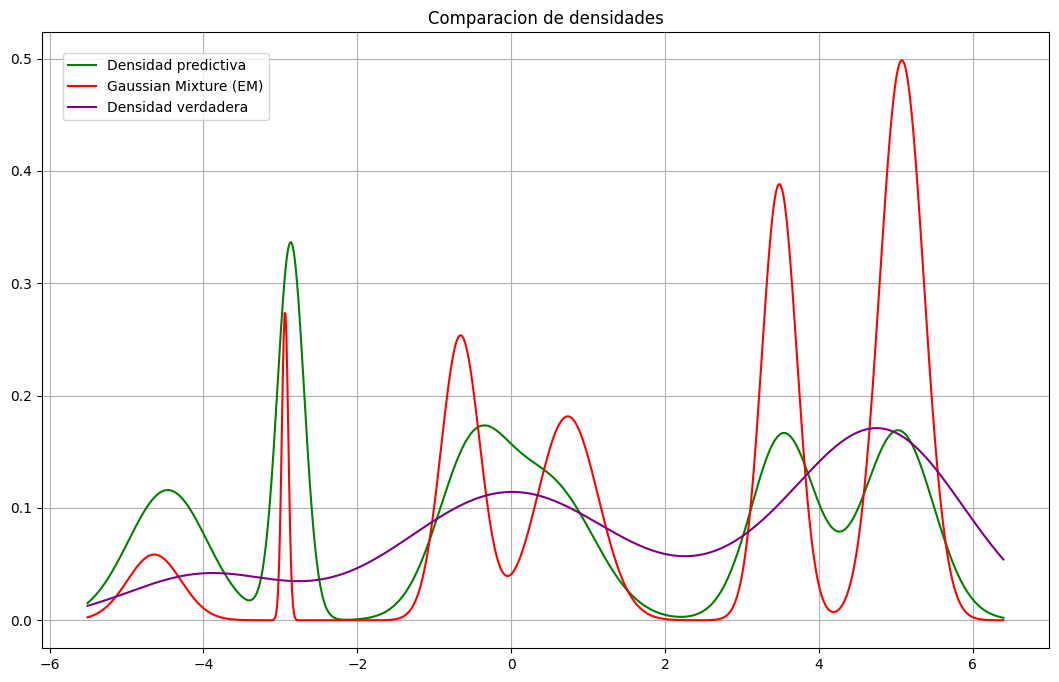

In [ ]:
predicitva = predicted_density(x,alpha, delta, m, beta, nu)

plt.figure(figsize=(13,8))
plt.plot(x,predicitva, label=  'Densidad predictiva',color='green')
plt.plot(x, mixture_density(x,p_gm,mu_gm,sigma_gm), label="Gaussian Mixture (EM)", color= 'red')
plt.plot(x,mixture_density(x, p, mu, np.sqrt(var)), label= "Densidad verdadera", color='purple')
plt.grid(True)
plt.title("Comparacion de densidades")
plt.legend(loc='best', borderaxespad=1.5)

#Ej 5

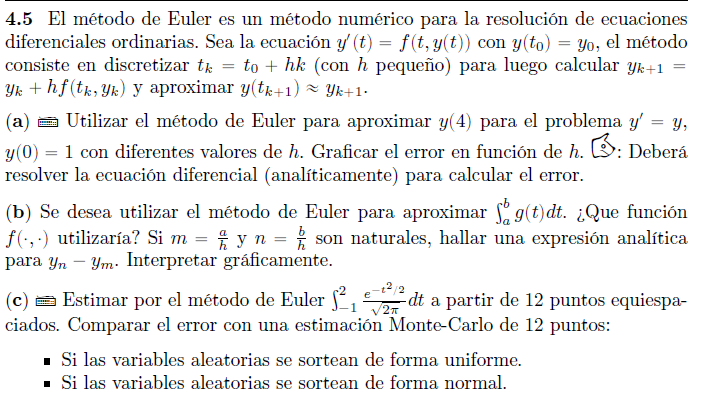

Se tiene el siguiente problema
$$y' = y$$
Resolviendo esta ecuacion diferencial queda que.
$$\int \frac{dy}{y}=\int dt\Rightarrow \ln(y(t))=t+c\Rightarrow y(t) = Ke^t$$
Siendo $K \in \mathbb R$ en donde para $y(0)=1$ queda que $K=1$.

El valor exacto de $y(4)$ es $e^4$.

El metodo de euler propone que.
$$y_{k+1}=y_k+hf(t_k,y_k)$$
Pero como $f(t_k,y_k) =y'= y$ entonces.
$$y_{k+1}=y_k+hy_k\Rightarrow y_{k+1}=y_k(1+h)$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
def metodo_euler(y0, h, t_end):
    t_valores = np.arange(0, t_end + h, h)
    y_valores = np.zeros(t_valores.shape[0])
    y_valores[0] = y0

    for k in np.arange(1,t_valores.shape[0]):
        y_valores[k] = y_valores[k-1] * (1 + h)

    return y_valores


Como se puede ver en el grafico, a mayor paso mas error pero menos iteraciones con necesarias, pero para paso mas finos, el error es menor pero aca cantidad de iteraciones es mas alta.

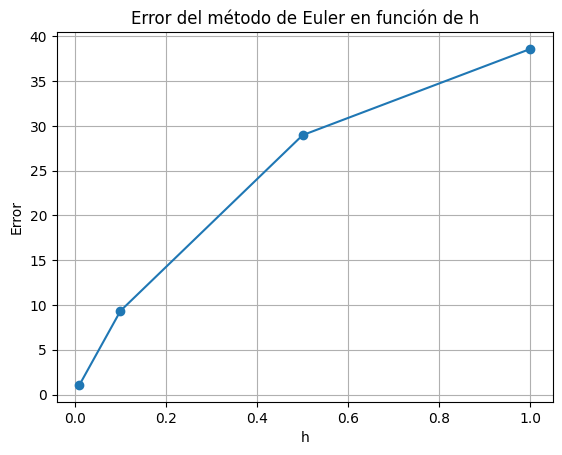

In [ ]:
#Pruebo para distintos valores de h
y0 = 1
t_final = 4
h = np.array([1, 0.5, 0.1, 0.01])

# Valor 'exacto'
y_exact = np.exp(t_final)

#computo del error
error = np.zeros_like(h)
for i in np.arange(h.shape[0]):
    y_values = metodo_euler(y0, h[i], t_final)
    error[i] = np.abs(y_exact - y_values[-1])

plt.plot(h, error, marker='o')
plt.xlabel('h')
plt.ylabel('Error')
plt.title('Error del método de Euler en función de h')
plt.grid(True)
plt.show()

Para aproximar la integral de la forma $\int^{b}_{a}g(t)\, dt$ la funcion f(t,y(t)) debe ser continua al menos en el intervalo $[a,b]$ y ser independiente de $y$. Asegurando asi que no haya discontinuidades o saltos en la función que puedan causar errores significativos en la aproximación. Luego en particulara para el problema de euler.
$$y'=f(t,y(t))=g(t)\Rightarrow \int^{b}_{a}dy= \int^{b}_{a} g(t)\,dt$$
Considerando el problema de valores inciales con la condicion de que $g(a)=0$ y aplicando el método de Euler para cada paso $t_k$.
$$y_{k+1}=y_k+hg(t_k)$$
En donde $t_k = a+hk$. Se puede aroximar la integral como una suma acumulada de la siguiente manera.
$$\int^{b}_{a}g(t)\, dt = y_n-y_0=\sum^{n-1}_{k=0}hg(t_k)$$

Siendo $m=\frac{a}{h}$ y $n=\frac{b}{h}$ se reescribe la sumatoria de la siguiente manera.
$$y_n-y_m=\sum^{n-1}_{k=m}hg(t_k)$$

Valor exacto de la integral: 2.00000
Aproximación de la integral usando el método de Euler: 1.99955


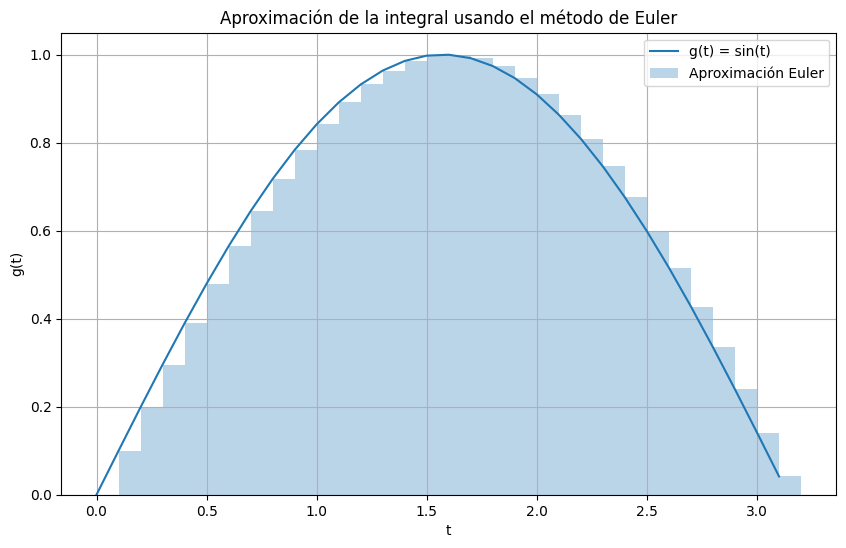

In [ ]:
def euler_integral(a, b, h, g):
    t_values = np.arange(a, b, h)
    y = 0
    for t in t_values:
        y += h * g(t)
    return y

def g(t):
    return np.sin(t)

a = 0
b = np.pi
h = 0.1

integral_euler = euler_integral(a, b, h, g)
integral_exact = -np.cos(b) + np.cos(a)

print(f"Valor exacto de la integral: {integral_exact:.5f}")
print(f"Aproximación de la integral usando el método de Euler: {integral_euler:.5f}")

t_values = np.arange(a, b, h)
g_values = g(t_values)

plt.figure(figsize=(10, 6))
plt.plot(t_values, g_values, label='g(t) = sin(t)')
plt.bar(t_values, g_values, width=h, alpha=0.3, align='edge', label='Aproximación Euler')
plt.xlabel('t')
plt.ylabel('g(t)')
plt.title('Aproximación de la integral usando el método de Euler')
plt.legend()
plt.grid(True)
plt.show()

Finalmente se pide aproximar la integral $$\int^{2}_{-2}\frac{e^{-\frac{t}{2}}}{\sqrt{2\pi}}\,dt$$ Mediante el metodo de euler y con el metodo de Monte-Carlo.

El metodo de Monte Carlo consta de aproximar cualquier tipo de integral a traves de numeros aleatorios. De la siguiente forma.
$$\int_{\mathbb R}g(x)p(x)\approx \frac{1}{n}\sum^{n}_{i=1}g(X_i)\,\,\,\, \sum_{x\in \mathbb A}g(x)P(x)\approx \frac{1}{n}\sum^{n}_{i=1}g(X_i)$$
En donde $X_i$ son V.A con pdf $p(x)$ o pmf $P(x)$.
Si para este problema se usaran dos pdf para aproximar dicha integral (siendo g(x)=$\frac{e^{-\frac{t}{2}}}{\sqrt{2\pi}}$) que son la uniforme y la normal. Las aproximaciones son las siguientes.

$$\int^{b}_{a}g(x)\, dx=\frac{b-a}{n}\sum^{n}_{i=1}g(X_i)\,\,\,\text{Para } X_i\sim \mathcal U(0,1)$$
$$\int^{b}_{a}g(x)\, dx=\frac{1}{kn}\sum^{n}_{i=1}\mathbf{1}\{a<X_i<b\}\,\,\,\,\text{Para } X_i\sim \mathcal N(0,1)=k\cdot g(x)$$

In [ ]:
from scipy.integrate import quad
a = -2
b = 2
n = 12
h = (b-a)/(n-1)

def f(t):
    return np.exp(-t**2 / 2) / np.sqrt(2 * np.pi)

y_euler = euler_integral(a,b,h,f)

t_mc = np.random.uniform(a, b, n)
y_mc = np.mean(f(t_mc))*(b-a)

t_mc_n = np.random.normal(0, 1, n)
#selecciono los valores que estan dentro del rango -2,2 (aplicando indicadora). Ademas considero k=1.
y_mc_n = np.sum(np.where((t_mc_n >= a) & (t_mc_n <= b),1,0))/n

#realizo integral 'exacta' con los cuantiles
y_exact = 2*norm.cdf(2)-1

# Errores
error_euler = np.abs(y_exact - y_euler)
error_mc = np.abs(y_exact - y_mc)
error_mc_n = np.abs(y_exact - y_mc_n)
print(f"Valor exacto: {y_exact:.5f}")
print(f"Aproximación Euler: {y_euler:.5f} con error {error_euler:.5f}")
print(f"Aproximación Monte-Carlo (uniforme): {y_mc:.5f} con error {error_mc:.5f}")
print(f"Aproximación Monte-Carlo (normal): {y_mc_n:.5f} con error {error_mc_n:.5f}")

Valor exacto: 0.95450
Aproximación Euler: 0.95213 con error 0.00237
Aproximación Monte-Carlo (uniforme): 0.92538 con error 0.02912
Aproximación Monte-Carlo (normal): 0.91667 con error 0.03783


#Ej 6

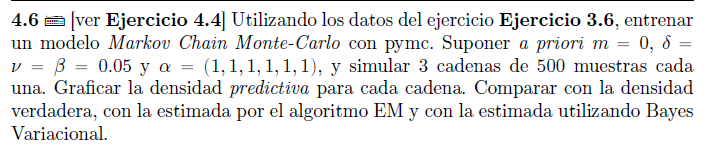

In [ ]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.mixture import GaussianMixture
import scipy.special
from scipy.special import digamma

Primero utilizo las funciones previamente utilizadas en otros ejercicios

In [ ]:
# Función para generar muestras de mezclas de gaussianas
def muestras_mezcla_gaussianas(pesos, medias, desviaciones_estandar, n_muestras):
    componentes = np.random.choice(len(pesos), size=n_muestras, p=pesos)
    muestras = np.array([np.random.normal(loc=medias[i], scale=desviaciones_estandar[i]) for i in componentes])
    return muestras

In [ ]:
def mixture_density(x, weights, means, variances):
    density = np.zeros_like(x)
    for weight, mean, variance in zip(weights, means, variances):
        density += weight * norm.pdf(x, mean, variance)
    return density

In [ ]:
# Parámetros del ejercicio 3.6
p = np.array([0.1, 0.4, 0.2, 0.3])
mu = np.array([-4, 0, 4, 5])
var = np.array([1, 1.96, 1.44, 1])
muestras = muestras_mezcla_gaussianas(p, mu, np.sqrt(var), 100)

# Densidad verdadera
x = np.linspace(-10, 10, 300)
true_density = np.zeros_like(x)
for weight, mean, variance in zip(p, mu, var):
    true_density += weight * norm.pdf(x, mean, np.sqrt(variance))

In [ ]:
#Densidad por EM

gm = GaussianMixture(n_components=6,init_params='kmeans').fit(muestras.reshape(-1,1))
mu_gm = gm.means_
sigma_gm = gm.covariances_[:,0]
p_gm = gm.weights_

em_density = mixture_density(x,p_gm,mu_gm,sigma_gm)

In [ ]:
#Densidad por Variational Bayes
def Gaussian_Variational_Bayes(muestras, alpha, m, delta, nu, beta, Nk, fk, sk, max_iter=100):
    for _ in np.arange(max_iter):
        #actualizacion de paraametros
        new_alpha = alpha + Nk
        new_m = (delta*m+fk)/(delta+Nk)
        new_delta = delta + Nk
        new_nu = nu+0.5*Nk
        new_beta = beta+0.5*((delta*m**2)+sk)-((delta*m+fk)**2)/(2*(delta+Nk))

        #actualizacion de las gammas
        rho = np.exp((digamma(new_alpha)-digamma(np.sum(new_alpha))+0.5*(digamma(new_nu)-np.log(new_beta))-(1/(2*np.log(new_delta))))[:,np.newaxis]
                    -((new_nu/(2*new_beta))[:,np.newaxis]*(new_m[:,np.newaxis]-muestras[np.newaxis,:])**2))

        gamma = (rho/np.sum(rho,axis=1)[:,np.newaxis])
        Nk, fk, sk = np.sum(gamma,axis=1), np.sum(gamma*muestras,axis=1), np.sum(gamma*muestras**2,axis=1)
        alpha, m, delta, nu, beta = new_alpha, new_m, new_delta, new_nu, new_beta

    return alpha, m, delta, nu, beta

In [ ]:
gamma = gm.predict_proba(muestras.reshape(-1,1)).T

Nk = np.sum(gamma,axis=1)
fk = np.sum(gamma*muestras,axis=1)
sk = np.sum(gamma*muestras**2,axis=1)

alpha = np.array([1, 1, 1, 1, 1, 1])
m0 = 0
delta = nu = beta = 0.05

alpha, m, delta, nu, beta = Gaussian_Variational_Bayes(muestras, alpha, m0, delta, nu, beta, Nk, fk, sk)

cant_componentes = 6
cant_muestras = 3

pi_gvb  = np.random.dirichlet(alpha=alpha,size=cant_muestras)
Lambda_gvb = np.random.gamma(nu, scale=1/beta,size=(cant_muestras,cant_componentes))
mu_gvb = np.random.normal(m,np.sqrt(1/(delta*Lambda_gvb)), size= (cant_muestras, cant_componentes))

x_ = np.linspace(np.min(muestras),np.max(muestras),1000)
densidades = np.zeros((cant_componentes,1000))

for i in np.arange(cant_muestras):
    densidades[i,:] = mixture_density(x_,pi_gvb[i,:],mu_gvb[i,:],1/Lambda_gvb[i,:])

In [ ]:
def predicted_density(x,alpha, delta, m, beta, nu):
    def generalized_t(mu,Lambda,nu):
        return (scipy.special.gamma((nu+1)*0.5)/scipy.special.gamma(0.5*nu))*np.sqrt(Lambda/(np.pi*nu))*(1+Lambda*(x-mu)**2/(nu))**(-(nu+1)*0.5)
    mu = m
    Lambda = delta*nu/((delta+1)*beta)
    nu_ = 2*nu
    alpha_scaled = alpha/np.sum(alpha)
    result = np.zeros_like(x)
    for i in np.arange(alpha.shape[0]):
        result += alpha_scaled[i]*generalized_t(mu[i],Lambda[i],nu_[i])
    return result

Defino el modelo de Monte Carlo con PYMC

In [ ]:
# Defino el modelo MCMC con pymc
with pm.Model() as model:
    # Proporciones de la mezcla
    pi = pm.Dirichlet('pi', a=alpha)

    # Priors para las precisiones (lambda = 1/variance)
    lambda_k = pm.Gamma('lambda_k', alpha=nu, beta=beta, shape=6)

    # Priors para las medias condicionales a las precisiones
    mu_k = pm.Normal('mu_k', mu=m, sigma=pm.math.sqrt(1 / (delta * lambda_k)), shape=6)

    # Priors para las etiquetas de los componentes
    u = pm.Categorical('u', p=pi, shape=muestras.shape[0])

    # Priors para los datos condicionales a las etiquetas, medias y precisiones
    x = pm.Normal('x', mu=mu_k[u], sigma=pm.math.sqrt(1 / lambda_k[u]), observed=muestras)

    # Muestreo de 3 cadenas de 500 muestras cada una
    trace = pm.sample(500, chains=3)



Grafico para verificar que el modelo realizado concide con la del Varational Bayes

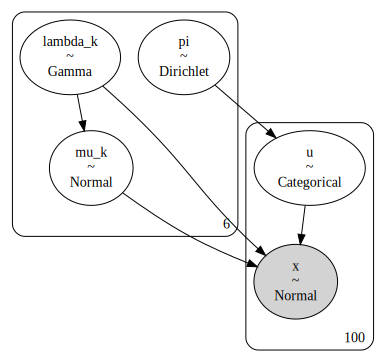

In [ ]:
pm.model_to_graphviz(model)

Obtengo la predicitiva en base a las cadenas

In [ ]:
with model:
    posterior_samples = pm.sample_posterior_predictive(trace)

pred_samples = posterior_samples.posterior_predictive['x']

In [ ]:
pred_samples.shape

(3, 500, 100)

Realizo la comparacion de las densisdades predicitvas por Bayes y PYMC, ademas grafico la densisdad original y la posteriori calculada por EM (_Gaussian Mixture_)

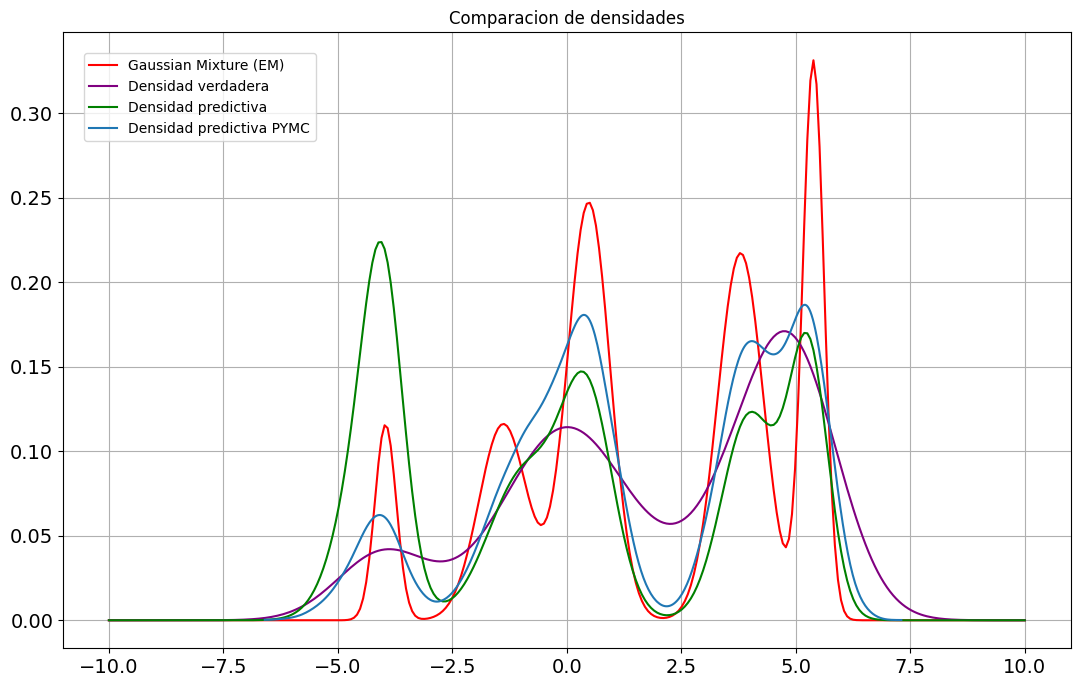

In [ ]:
import arviz as az
x_ = np.linspace(-10, 10, 300)
predicitva = predicted_density(x_,alpha, delta, m, beta, nu)

plt.figure(figsize=(13,8))
plt.plot(x_, em_density, label="Gaussian Mixture (EM)", color= 'red')
plt.plot(x_,true_density, label= "Densidad verdadera", color='purple')
plt.plot(x_,predicitva, label=  'Densidad predictiva',color='green')
az.plot_kde(pred_samples.values[0].reshape(-1), label=  'Densidad predictiva PYMC')

plt.grid(True)
plt.title("Comparacion de densidades")
plt.legend(loc='best', borderaxespad=1.5)

#Ej 7

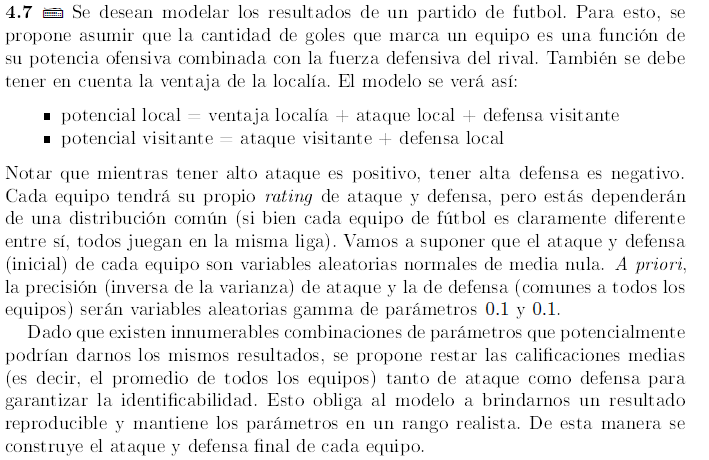

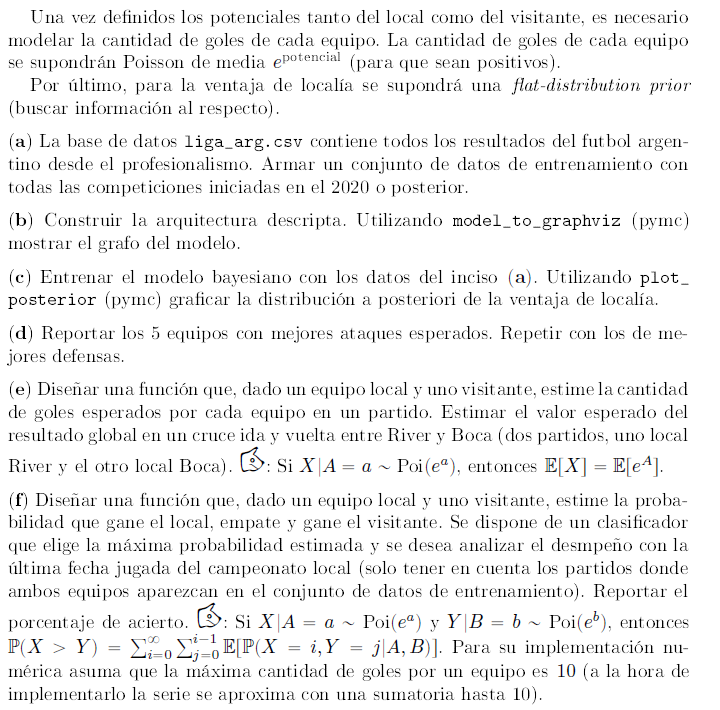

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from urllib import request
import pandas as pd
import pymc as pm
import arviz as az

from scipy.special import factorial
from scipy.stats import poisson

In [ ]:
example_url="https://raw.githubusercontent.com/mvera1412/tallerPS/main/data/liga_arg.csv"
f = request.urlopen(example_url)
database = pd.read_csv(f, sep=",")

In [ ]:
database

,date_name,local_team,local_result,visitor_result,visitor_team
0,Campeonato 1931,Atlanta,1,1,Velez
1,Campeonato 1931,Racing Club,1,1,Quilmes
2,Campeonato 1931,Quilmes,2,0,Racing Club
3,Campeonato 1931,Huracan,2,4,Racing Club
4,Campeonato 1931,Boca Juniors,5,2,Atlanta
...,...,...,...,...,...
34351,Copa de la Liga 2023,Huracan,0,0,Barracas Central
34352,Copa de la Liga 2023,Platense,0,0,Newells
34353,Copa de la Liga 2023,Tigre,1,0,Godoy Cruz
34354,Copa de la Liga 2023,Central Cba (SdE),2,0,Union


Armo una database de entrenamiento para todos los partidos desde el 2020 hacia adelante.

In [ ]:
campeonatos = database.date_name.to_numpy()
years = np.array([s[-4:] for s in campeonatos])
target_years = ['2020', '2021', '2022', '2023', '2024']

indices = np.where(np.isin(years, target_years))[0]

train_database = database.iloc[indices]

In [ ]:
train_database

,date_name,local_team,local_result,visitor_result,visitor_team
32332,Liga Profesional 2019/2020,Racing Club,0,0,Union
32333,Liga Profesional 2019/2020,Colon,0,1,Patronato
32334,Liga Profesional 2019/2020,San Lorenzo,3,2,Godoy Cruz
32335,Liga Profesional 2019/2020,Lanus,1,1,Gimnasia (LP)
32336,Liga Profesional 2019/2020,Argentinos,1,1,River Plate
...,...,...,...,...,...
34351,Copa de la Liga 2023,Huracan,0,0,Barracas Central
34352,Copa de la Liga 2023,Platense,0,0,Newells
34353,Copa de la Liga 2023,Tigre,1,0,Godoy Cruz
34354,Copa de la Liga 2023,Central Cba (SdE),2,0,Union


Creo un diccionario con los nombres de los equipos, asignando a caa uno de ellos un numero entero. Lo mismo de forma inversa para uso posterior

In [ ]:
#Hago copy porque sino me hace un warning
train_database = train_database.copy()

#Creo un mapeo de nombres de equipos a índices
teams = np.unique(train_database[['local_team', 'visitor_team']])
team_dict = {team: i for i, team in enumerate(teams)}

#Creo variables de equipos locales y visitantes en formato numérico
train_database.loc[:,'local_idx'] = train_database['local_team'].map(team_dict)
train_database.loc[:,'visitor_idx'] = train_database['visitor_team'].map(team_dict)

#Resultados de los partidos
goles_locales = train_database['local_result'].values
goles_visitantes = train_database['visitor_result'].values

#Equipos locales y visitantes en formato numérico
local_teams = train_database['local_idx'].values
visitor_teams = train_database['visitor_idx'].values

n_teams = np.unique(train_database.local_team).shape[0]

In [ ]:
train_database

,date_name,local_team,local_result,visitor_result,visitor_team,local_idx,visitor_idx
32332,Liga Profesional 2019/2020,Racing Club,0,0,Union,21,28
32333,Liga Profesional 2019/2020,Colon,0,1,Patronato,9,19
32334,Liga Profesional 2019/2020,San Lorenzo,3,2,Godoy Cruz,24,13
32335,Liga Profesional 2019/2020,Lanus,1,1,Gimnasia (LP),17,12
32336,Liga Profesional 2019/2020,Argentinos,1,1,River Plate,1,22
...,...,...,...,...,...,...,...
34351,Copa de la Liga 2023,Huracan,0,0,Barracas Central,14,5
34352,Copa de la Liga 2023,Platense,0,0,Newells,20,18
34353,Copa de la Liga 2023,Tigre,1,0,Godoy Cruz,27,13
34354,Copa de la Liga 2023,Central Cba (SdE),2,0,Union,8,28


*En base a los datos de entrenamiento* construyo la arquitectura descripta en el enunciado.

El ataque y defensa de cada equipo se distribuye como una normal de media nula y de precision $\tau$.
$$\text{Ataque}^{(i)}\sim \mathcal N(0,\tau_{ataque})\,\,\,\,\,\text{Defensa}^{(i)}\sim \mathcal N(0,\tau_{defensa}) $$
En donde la precision se distribuye de la siguiente forma.
$$\tau_{ataque},\tau_{defensa}\sim \Gamma(0.1,0.1)$$

La media de  la ataque y defensa de cada equipo se determina restando el ataque de cada equipo con la media total de todos los ataques y defensas de todos los equipos
$$\mu_{ataque}^{(i)}= \text{Ataque}^{(i)}-\mathbb E[\text{Ataque}]\\
\mu_{defensa}^{(i)}= \text{Defensa}^{(i)}-\mathbb E[\text{Defensa}]$$

La ventaja de la localia se distribuye a *priori* como *flat-distribution prior*
$$\text{Ventaja Localia}\sim \text{Flat}$$

Luego el potencial de cada equipo segun si es local o visitante es de la forma.

$$\text{potencial local}= \text{ventaja localía}+ \text{ataque local}+\text{defensa visitante}$$
$$\text{potencial visitante}=\text{ataque visitante}+\text{defensa local}$$

Finalmente se puede estimar los goles de cada equipo mediante la distribucion de poisson.

$$\text{Goles}\sim \text{Poi}(e^{\text{potencial}})$$

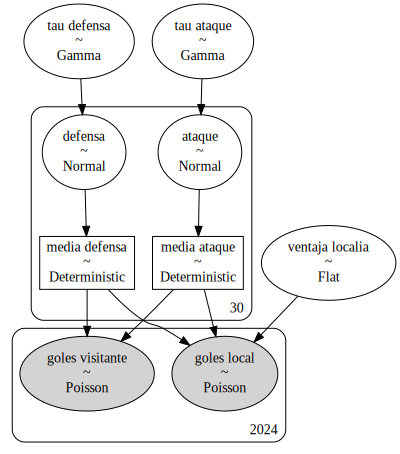

In [ ]:
with pm.Model() as model:
  # Ventaja de localía.
  home_advantage = pm.Flat("ventaja localia")

  # Precisión (inversa de la varianza).
  tau_attack = pm.Gamma("tau ataque", alpha=0.1, beta=0.1)
  tau_defense = pm.Gamma("tau defensa", alpha=0.1, beta=0.1)

  # Ataque y defensa inicial.
  attack = pm.Normal("ataque", mu=0, sigma=1/np.sqrt(tau_attack), shape=n_teams)
  defense = pm.Normal("defensa", mu=0, sigma=1/np.sqrt(tau_defense), shape=n_teams)

  # Normalización.
  attack_mean = pm.Deterministic("media ataque", attack - pm.math.mean(attack))
  defense_mean = pm.Deterministic("media defensa", defense - pm.math.mean(defense))

  # Potencial de goles.
  potential_local   = home_advantage + attack_mean[local_teams] + defense_mean[visitor_teams]
  potential_visitor = attack_mean[visitor_teams] + defense_mean[local_teams]

  # Modelado de goles como Poisson.
  y_local   = pm.Poisson("goles local",   mu = pm.math.exp(potential_local)  , observed = goles_locales)
  y_visitor = pm.Poisson("goles visitante", mu = pm.math.exp(potential_visitor), observed = goles_visitantes)

  # Inferencia
  trace = pm.sample(1000, tune=1000, return_inferencedata=True)

# Visualización del modelo
pm.model_to_graphviz(model)

En base a los datos de entrenamiento y la arquitectura establecida grafico la densidad *a posteriori* de la ventaja localia, que *a priori* tenia una densidad del tipo *flat-distribution*

<Figure size 1000x600 with 0 Axes>

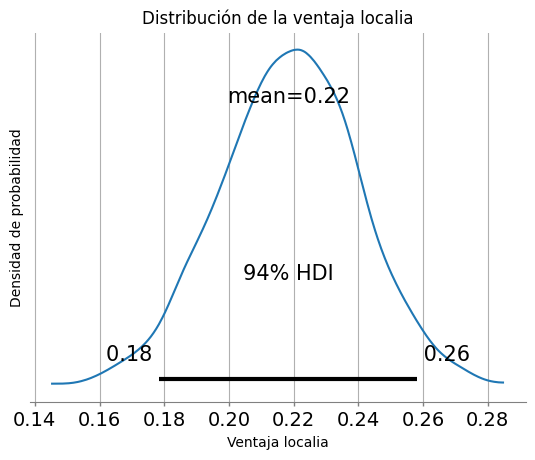

In [ ]:
ventaja_localia = trace.posterior["ventaja localia"]
plt.figure(figsize=(10, 6))
az.plot_posterior(ventaja_localia)
plt.grid(True)
plt.title("Distribución de la ventaja localia")
plt.xlabel("Ventaja localia")
plt.ylabel("Densidad de probabilidad")
plt.show()

Obtengo las medias a posteriori de los ataques y defensas de todos los equipos, luego ordeno de mayor a menor para finalmente obtener a los 5 mejores equipos en cada aspecto.

In [ ]:
attack_means = trace.posterior["media ataque"].mean(dim=("chain", "draw")).values
defense_means = trace.posterior["media defensa"].mean(dim=("chain", "draw")).values

In [ ]:
top_5_attack_teams = np.argsort(attack_means)[-5:][::-1]
top_5_defense_teams = np.argsort(defense_means)[:5]

In [ ]:
print("Los 5 equipos con mejores ataques esperados:")
for i in top_5_attack_teams:
    print(teams[i])

Los 5 equipos con mejores ataques esperados:
River Plate
Boca Juniors
Def y Justicia
Talleres (C)
Racing Club


In [ ]:
print("Los 5 equipos con mejores defensas esperadas:")
for i in top_5_defense_teams:
    print(teams[i])

Los 5 equipos con mejores defensas esperadas:
Boca Juniors
River Plate
Velez
Argentinos
Banfield


Creo un funcion que estime los goles segun el equipo local y visitante. En funcion de los datos generados.

In [ ]:
def goles_estimados(local_team, visitor_team, trace):
    #Extraigo las medias a posteriori
    attack_means = trace.posterior["media ataque"]
    defense_means = trace.posterior["media defensa"]
    home_advantage = trace.posterior["ventaja localia"]

    #Calcular el potencial de los equipos (dimension de attack_means y defense_means es de (chains, draws, teams))
    potential_local = home_advantage + attack_means[:,:,local_team] + defense_means[:,:,visitor_team]
    potential_visitor = attack_means[:,:,visitor_team] + defense_means[:,:,local_team]

    # Estimar los goles esperados usando la esperanza de e^a
    expected_goals_local = np.exp(potential_local).mean()
    expected_goals_visitor = np.exp(potential_visitor).mean()
    return expected_goals_local, expected_goals_visitor


Simulo un Boca-River para la ida y para la vuelta.

In [ ]:
# Goles esperados para el partido River (local) y Boca (visitante)
goles_river_local, goles_boca_visitante = goles_estimados(team_dict['River Plate'], team_dict['Boca Juniors'], trace)

# Goles esperados para el partido Boca (local) y River (visitante)
goles_boca_local, goles_river_visitante = goles_estimados(team_dict['Boca Juniors'], team_dict['River Plate'], trace)

total_goles_river = goles_river_local + goles_river_visitante
total_goles_boca = goles_boca_local + goles_boca_visitante

print(f"Valor esperado de goles de River en el cruce ida y vuelta: {total_goles_river:.2f}")
print(f"Valor esperado de goles de Boca en el cruce ida y vuelta: {total_goles_boca:.2f}")

Valor esperado de goles de River en el cruce ida y vuelta: 2.70
Valor esperado de goles de Boca en el cruce ida y vuelta: 2.11


Estimo las probabilidades de victoria segun la siguiente formula.

$$\mathbb P(X>Y)=\sum^{\infty}_{i=0}\sum^{i-1}_{j=0}\mathbb E[\mathbb P(X=i, Y=j|A=a,B=b)]$$



Siendo.
$$X|A=a\sim \text{Poi}(e^a)\,\,\,\,\,Y|B=b\sim \text{Poi}(e^b)$$

In [ ]:
def estimate_probabilities(local_team, visitor_team, trace, dictionary,max_goals=10):
    #Extraigo las medias a posteriori
    attack_means = trace.posterior["media ataque"]
    defense_means = trace.posterior["media defensa"]
    home_advantage = trace.posterior["ventaja localia"]

    local_idx = dictionary[local_team]
    visitor_idx = dictionary[visitor_team]

    #Calculo el potencial de los equipos (dimension de attack_means y defense_means es de (chains, draws, teams))
    potential_local = home_advantage + attack_means[:,:,local_idx] + defense_means[:,:,visitor_idx]
    potential_visitor = attack_means[:,:,visitor_idx] + defense_means[:,:,local_idx]

    #Calculo las probabilidades de goles usando Poisson
    p_win = 0
    p_draw = 0
    p_loss = 0
    for lambda_local, lambda_visitor in zip(potential_local, potential_visitor):
      p_win += np.sum([poisson.pmf(i, np.exp(lambda_local)) * np.sum([poisson.pmf(j, np.exp(lambda_visitor)) for j in range(i)]) for i in range(1, max_goals+1)])
      p_draw += np.sum([poisson.pmf(i, np.exp(lambda_local)) * poisson.pmf(i, np.exp(lambda_visitor)) for i in range(max_goals+1)])
      p_loss += np.sum([poisson.pmf(i, np.exp(lambda_local)) * np.sum([poisson.pmf(j, np.exp(lambda_visitor)) for j in range(i+1, max_goals+1)]) for i in range(max_goals+1)])

    p_win /= len(potential_local)
    p_draw /= len(potential_local)
    p_loss /= len(potential_local)
    return p_win, p_draw, p_loss

Funcion para evaluar el clasificador

In [ ]:
def evaluate_classifier(trace, dictionary, last_matchday_data):
    correct_predictions = 0
    total_predictions = 0

    for _, match in last_matchday_data.iterrows():
      local_team = match['local_team']
      visitor_team = match['visitor_team']

      if local_team in dictionary and visitor_team in dictionary:
          total_predictions += 1
          p_local_wins, p_draw, p_visit_wins = estimate_probabilities(local_team, visitor_team, trace, dictionary)

          predicted_outcome = np.argmax([p_local_wins, p_draw, p_visit_wins])
          actual_outcome = 0 if match['local_result'] > match['visitor_result'] else 1 if match['local_result'] == match['visitor_result'] else 2

          if predicted_outcome == actual_outcome:
              correct_predictions += 1

    accuracy = correct_predictions / total_predictions if total_predictions > 0 else 0
    return accuracy

Creo un dataset con los resultados de la ultima fecha de la liga profesional (habia equipos que no estaban incluidos en el data set de entrenamiento, por lo que esos partidos se los eliminó).

In [ ]:
#Datos de los partidos válidos
last_matchday_data = {
    "local_team": [
        "Argentinos", "Instituto", "Barracas Central", "Rosario Central",
        "San Lorenzo", "Racing Club", "Banfield", "River Plate",
        "Central Cba (SdE)", "Estudiantes (LP)", "Def y Justicia", "Velez"
    ],
    "local_result": [
        0, 3, 0, 4, 1, 3, 1, 2, 0, 4, 2, 3
    ],
    "visitor_result": [
        2, 1, 1, 2, 1, 0, 1, 2, 2, 0, 1, 0
    ],
    "visitor_team": [
        "Tigre", "Independiente", "Newells", "Sarmiento (J)",
        "Huracan", "Godoy Cruz", "Atl Tucuman", "Lanus",
        "Platense", "Union", "Boca Juniors", "Talleres (C)"
    ]
}

#Creo el DataFrame
last_matchday_df = pd.DataFrame(last_matchday_data)

#Muestro el DataFrame
print(last_matchday_df)


           local_team  local_result  visitor_result   visitor_team
0          Argentinos             0               2          Tigre
1           Instituto             3               1  Independiente
2    Barracas Central             0               1        Newells
3     Rosario Central             4               2  Sarmiento (J)
4         San Lorenzo             1               1        Huracan
5         Racing Club             3               0     Godoy Cruz
6            Banfield             1               1    Atl Tucuman
7         River Plate             2               2          Lanus
8   Central Cba (SdE)             0               2       Platense
9    Estudiantes (LP)             4               0          Union
10     Def y Justicia             2               1   Boca Juniors
11              Velez             3               0   Talleres (C)


In [ ]:
accuracy = evaluate_classifier(trace,team_dict,last_matchday_df)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.50
